**## Build Fine-tuned VGG16 model**

We are going to use VGG16 for our classification problem.

First we to download pre-trained VGG16 network which is trained for classifying 1000 objects. Hence the final softmax layer will have 1000 outputs.



In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing dataset from the drive. This is same as in the previous exercises.**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path='/content/drive/MyDrive/dataset/train'
valid_path='/content/drive/MyDrive/dataset/validation'
test_path='/content/drive/MyDrive/dataset/test'

train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['dogs','cats'],batch_size=50)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['dogs','cats'],batch_size=50)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['dogs','cats'],batch_size=50,shuffle=False)

imgs,labels=next(train_batches)

Found 2819 images belonging to 2 classes.
Found 1219 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

vgg16_model=tf.keras.applications.vgg16.VGG16()

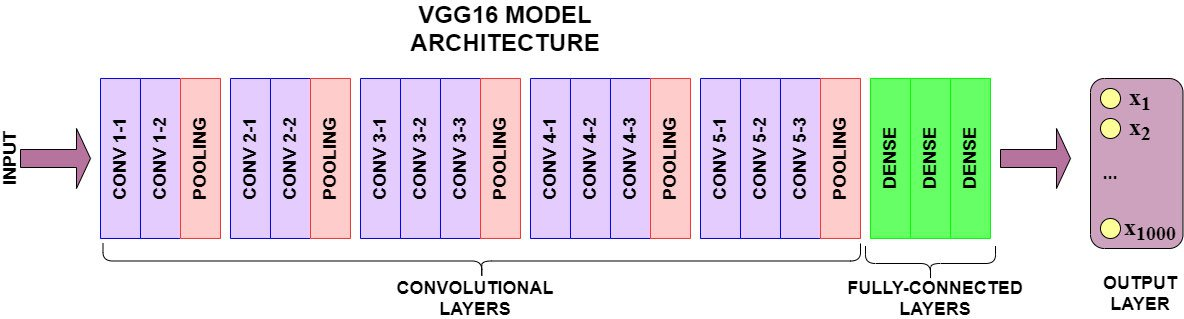

In [5]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Step-1: Define architecture of the model**

We are using VGG16 model layers till the last layer. Based on the type of classification problem we will define the last layer



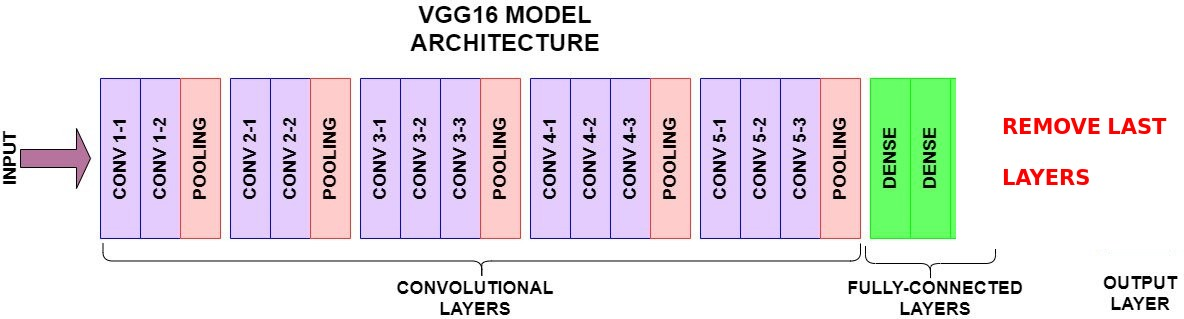

In [6]:
model=Sequential()
for layer in vgg16_model.layers[:-1]: #only last layer is removed by using -1; -2 will remove last two layers
  model.add(layer) #adding all the layers to the model till last before one.

In [7]:
model.summary() # the summary of the developed model along with trainable parameters in each layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [8]:
model.add(Dense(units=2,activation='softmax')) # now we are adding last layer and we want to perform cat/dog classification 
#hence the last layer has two neurons and activation is softmax.

In [9]:
model.summary() # with this summary, you may find the softmax layer added to the model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

**Calculate the trainable parameter in the last layer of the model!!**

In the last layer, there are two neurons and in the previous layer there are 4096 neurons.

The number of w parameters = 4096*2
The number of bias values = 2

Total number of parameters in the last layer = 8192+2=8194 parameters


**Step-2: Defining parameters of gradient descent**

In [10]:
model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy'])

**Step-3: Training the model**

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=1,verbose=1) 
# It will take more than 2 hrs to while running this cell as there are lakhs of parameters  

12/57 [=====>........................] - ETA: 1:26:24 - loss: nan - accuracy: 0.4917

**Step 4: Testing the trained model with the test data**

In [ ]:
predictions=model.predict(x=test_batches,verbose=2)


In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))


Confusion Matrix,without Normalization

[[98    2]

 [ 5   95]]

**Customising the pre-trained model: Transfer Learning** 

Transfering the learning which we learnt on some other problem into a new problem. Thats is the pre-trained model which is trained for specific cases can be used for other cases as well.

We will keep all the trainable parameters and its value as it is.. We will only train last layer based on the classification problem. 

In some cases if we didnt get statisfactory accuracy, we can train few more last layers. We can define how many layers to be trained and how many layers to be retained as in the pre-trained model.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [12]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [13]:
for layer in model.layers:
  layer.trainable=False

#Here we define all the layers(which is defined till now) not to be trained.

In [14]:
model.add(Dense(units=2,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

**Now we can see the number of trainable parameter is 8194 which corresponds to the last layer **

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=1)

Epoch 1/5
 3/57 [>.............................] - ETA: 28:31 - loss: 1.0021 - accuracy: 0.5933

In [ ]:
predictions=model.predict(x=test_batches,verbose=2)

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))
